In [20]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.metrics import r2_score


In [21]:

#reading the data
penguins = pd.read_csv('penguins.csv')
penguins = penguins[["CulmenDepth_mm","FlipperLength_mm","BodyMass_g"]] # selecting the columns we are going to examine
penguins = penguins.dropna() # removing NaN values
penguins # viewing the data we have selected 
penguins = np.array(penguins, dtype=float)
#plt.scatter(penguins["CulmenDepth_mm"],penguins["FlipperLength_mm"], penguins["BodyMass_g"]) 


In [109]:
#normalize data 
def normalize(penguins):
    for i in range(0,penguins.shape[1]-1):
        penguins[:,i] = ((penguins[:,i] - np.mean(penguins[:,i]))/np.std(penguins[:, i]))
print(penguins)

[[  18.7  181.  3750. ]
 [  17.4  186.  3800. ]
 [  18.   195.  3250. ]
 ...
 [  15.7  222.  5750. ]
 [  14.8  212.  5200. ]
 [  16.1  213.  5400. ]]


In [61]:
def standRegres(xArr, yArr): #function performs standard linear regression on input arrays
   xMat = np.mat(xArr) #converts input array to matrix
   yMat = np.mat(yArr).T #converts input array to matrix and transposes it
   xMat = np.hstack((np.ones((xMat.shape[0], 1)), xMat))  # Add column of ones to xMat so we can calculate for intercept as well
   xTx = xMat.T * xMat # calculates x transposed times x matrix
   if np.linalg.det(xTx) == 0.0: #if matrix is singular return nothing and stop
       print("This matrix is singular, cannot do inverse")
       return
   beta = xTx.I * (xMat.T * yMat) #inverse of xtx multiplied by transposed x and y matrix is calculated and returned as beta
   return beta #returns our slope and intercept

In [62]:
def predictY(X, beta): #takes an array X and previously calculated coefficients beta
   Xmat = np.mat(X) #creates a matrix out of the array
   Xmat = np.hstack((np.ones((Xmat.shape[0], 1)), Xmat))  # Add column of ones to xMat so we can account for intercept
   y_hat = Xmat * beta #predicts yhat based on Xmat matrix and coefficients beta (calculates slope*x+intercept)
   return y_hat #returns predicted values

In [112]:
def plotData(X, Y, y_hat): # takes x, y and yhats as inputs
   fig = plt.figure() #creates a plot
   ax = fig.add_subplot(111) #adds subplot
   ax.plot(X, y_hat) #no flattening since x is 1dimensional in this example. Plots yhat against X
   ax.scatter(X, Y, s=25, c='red') # plots actual values in red
   plt.show() #shows plot
   return

NameError: name 'X' is not defined

In [64]:
def rssError(yArr,yHatArr): #yArr and yHatArr both need to be arrays
   return ((yArr-yHatArr)**2).sum() # returns sum of squared distances between predicted and actual values


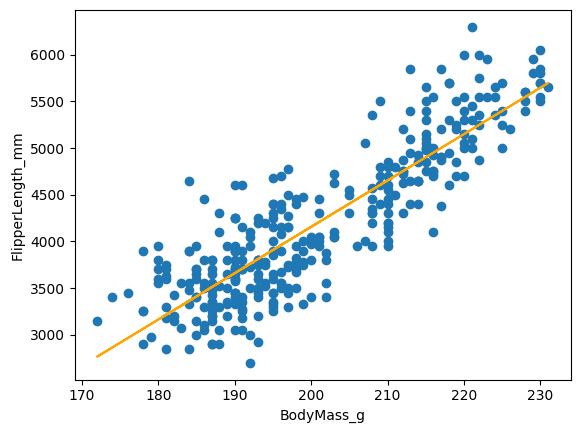

In [114]:
def main():
    df = pd.read_csv('penguins.csv') # reads the data
    df=df[["FlipperLength_mm","BodyMass_g"]] #selects columns 
    df= df.dropna() # drops the NaN values
    
    
    x = df["FlipperLength_mm"] #creating x array
    y = df["BodyMass_g"] #creating y array
    
        # calculate the slope and intercept of the best-fit line
    coefficients = np.polyfit(x, y, 1)
    p = np.poly1d(coefficients)

    # plot the data and the regression line
    plt.scatter(x, y)
    plt.plot(x, p(x), color='orange')
    plt.xlabel('BodyMass_g')
    plt.ylabel('FlipperLength_mm')
    plt.show()
        
    
main()

